# Spectra generation

Let's use a pretrained model for spectra.

In [1]:
from models import IcosphereModel
from spectrum import simulate_spectrum
from spectrum.planck_law import BlackbodySpectrum
from spectrum.spectrum_korg import KorgSpectrum
import astropy.units as u
import astropy.constants as const
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from jax import config

# This is crucial so that flux is calculated with proper precision
config.update("jax_enable_x64", True)

/Users/majajablonska/miniconda/envs/astro/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/majajablonska/miniconda/envs/astro/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


Models defined.


## Model construction

For user's convenience, there are **BlackbodySpectrum** and **KorgSpectrum** defined. The ```to_parameters``` methods convert named values (such as effective temperatures or abundances) into the parameter arrays with ordering expected by the models.

In [2]:
# Some base and spot temperature in K
base_temp = 5700
spot_temp = 4000
spot_diff = spot_temp - base_temp

m_blackbody = IcosphereModel.construct(1000, u.solRad.to(u.cm), u.solMass.to(u.kg), 1., BlackbodySpectrum.to_parameters(Teff=base_temp))
m_korg = IcosphereModel.construct(1000, u.solRad.to(u.cm), u.solMass.to(u.kg), 1., KorgSpectrum.to_parameters(Teff=base_temp))

In [8]:
vws = jnp.linspace(500., 15000., 100)
spectrum_blackbody = simulate_spectrum(BlackbodySpectrum.flux_method(), m_blackbody, jnp.log10(vws))

In [12]:
spectrum_korg = simulate_spectrum(KorgSpectrum.flux_method(), m_korg, jnp.log10(jnp.linspace(500., 15000., 100)))

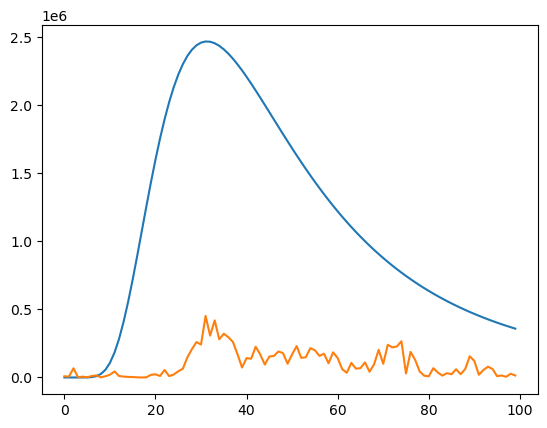

In [15]:
plt.plot(spectrum_blackbody[:, 0])
plt.plot(spectrum_korg[:, 0])